### Experimento para la búsqueda de la solución de la ecuación diferencial de la divergencia de u por diferencias finitas

#### I - Grilla de 5 x 5:

In [2]:
# Importa librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

Converge luego de 38 iteraticiones


C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\2650650772.py:51: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interpolator = interp2d(x, y, u.T, kind='cubic')  # Interpolador
C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\2650650772.py:52: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/

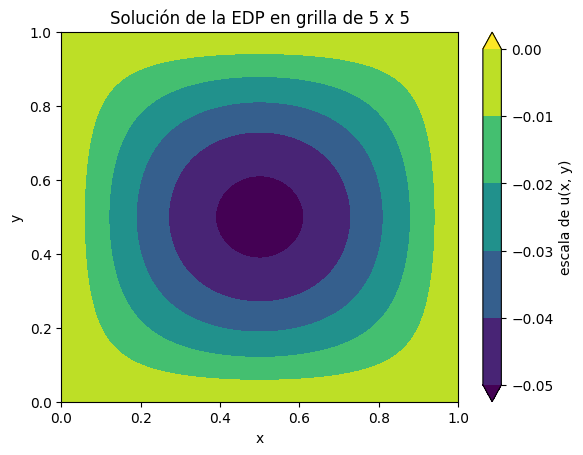

In [ ]:
# Parámetros del problema
Lx, Ly = 1.0, 1.0   # Longitud en las direcciones x e y
nx, ny = 5, 5       # Número de puntos en cada dirección
dx = Lx / (nx - 1)  # Espaciado en x
dy = Ly / (ny - 1)  # Espaciado en y

# Crea la grilla
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)

# Inicializa la matriz u (solución) y la div_u (EDP)
u = np.zeros((nx, ny))
div_u = np.sin(np.pi * x[:, None]) * np.sin(np.pi * y[None, :])

# Establece condiciones de borde de Dirichlet
u[:, 0] = 0    # u(x, 0) = 0
u[:, -1] = 0   # u(x, 1) = 0
u[0, :] = 0    # u(0, y) = 0
u[-1, :] = 0   # u(1, y) = 0

# Parámetros para el método iterativo
tolerance = 1e-12
max_iterations = 10000

# Método de diferencias finitas para la ecuación de Poisson
def poisson_solver(u, f, dx, dy, tolerance, max_iterations):
    for it in range(max_iterations):
        u_old = u.copy()
        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                u[i, j] = 0.25 * (
                    u[i+1, j] + u[i-1, j] +
                    u[i, j+1] + u[i, j-1] -
                    dx**2 * f[i, j]
                )
        # Condición de convergencia
        if np.linalg.norm(u - u_old) < tolerance:
            print(f"Converge luego de {it+1} iteraticiones")
            break
    return u

# Resuelve la ecuación de Poisson
u = poisson_solver(u, div_u, dx, dy, tolerance, max_iterations)

# Almacena la solución en una matriz
u_DF_5x5 = u

# Interpolación para una grilla fina
x_fine = np.linspace(0, Lx, 1000)
y_fine = np.linspace(0, Ly, 1000)
interpolator = interp2d(x, y, u.T, kind='cubic')
u_fine = interpolator(x_fine, y_fine)

# Grafica el resultado
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
cp = plt.contourf(X_fine, Y_fine, u_fine, cmap='viridis', levels=[-0.05, -0.04, -0.03, -0.02, -0.01, 0.00], vmin=-0.05, vmax=0.00, extend='both')
plt.colorbar(cp, label='escala de u(x, y)', extend='both', ticks=[-0.05, -0.04, -0.03, -0.02, -0.01, 0.00])
plt.title('Solución de la EDP en grilla de 5 x 5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Borra la solución para poder ser usada en los siguientes experimentos
del u

#### II - Grilla de 10 x 10:

Converge luego de 195 iteraticiones


C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\1939332827.py:51: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interpolator = interp2d(x, y, u.T, kind='cubic')  # Interpolador
C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\1939332827.py:52: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/

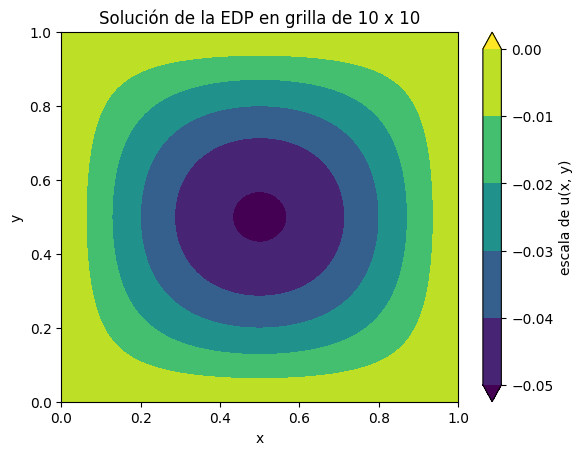

In [ ]:
# Parámetros del problema
Lx, Ly = 1.0, 1.0   # Longitud en las direcciones x e y
nx, ny = 10, 10     # Número de puntos en cada dirección
dx = Lx / (nx - 1)  # Espaciado en x
dy = Ly / (ny - 1)  # Espaciado en y

# Crea la grilla
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)

# Inicializa la matriz u (solución) y la div_u (EDP)
u = np.zeros((nx, ny))
div_u = np.sin(np.pi * x[:, None]) * np.sin(np.pi * y[None, :])

# Establece condiciones de borde de Dirichlet
u[:, 0] = 0    # u(x, 0) = 0
u[:, -1] = 0   # u(x, 1) = 0
u[0, :] = 0    # u(0, y) = 0
u[-1, :] = 0   # u(1, y) = 0

# Parámetros para el método iterativo
tolerance = 1e-12
max_iterations = 10000

# Método de diferencias finitas para la ecuación de Poisson
def poisson_solver(u, f, dx, dy, tolerance, max_iterations):
    for it in range(max_iterations):
        u_old = u.copy()
        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                u[i, j] = 0.25 * (
                    u[i+1, j] + u[i-1, j] +
                    u[i, j+1] + u[i, j-1] -
                    dx**2 * f[i, j]
                )
        # Condición de convergencia
        if np.linalg.norm(u - u_old) < tolerance:
            print(f"Converge luego de {it+1} iteraticiones")
            break
    return u

# Resuelve la ecuación de Poisson
u = poisson_solver(u, div_u, dx, dy, tolerance, max_iterations)

# Almacena la solución en una matriz
u_DF_10x10 = u

# Interpolación para una grilla fina
x_fine = np.linspace(0, Lx, 1000)
y_fine = np.linspace(0, Ly, 1000)
interpolator = interp2d(x, y, u.T, kind='cubic') 
u_fine = interpolator(x_fine, y_fine)

# Grafica el resultado
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
cp = plt.contourf(X_fine, Y_fine, u_fine, cmap='viridis', levels=[-0.05, -0.04, -0.03, -0.02, -0.01, 0.00], vmin=-0.05, vmax=0.00, extend='both')
plt.colorbar(cp, label='escala de u(x, y)', extend='both', ticks=[-0.05, -0.04, -0.03, -0.02, -0.01, 0.00])
plt.title('Solución de la EDP en grilla de 10 x 10')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Borra la solución para poder ser usada en los siguientes experimentos
del u

#### III - Grilla de 20 x 20:

Converge luego de 850 iteraticiones


C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\607034226.py:51: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interpolator = interp2d(x, y, u.T, kind='cubic')  # Interpolador
C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\607034226.py:52: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`b

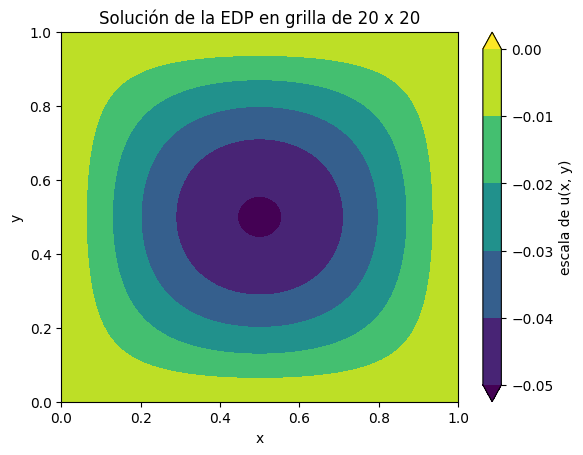

In [ ]:
# Parámetros del problema
Lx, Ly = 1.0, 1.0   # Longitud en las direcciones x e y
nx, ny = 20, 20     # Número de puntos en cada dirección
dx = Lx / (nx - 1)  # Espaciado en x
dy = Ly / (ny - 1)  # Espaciado en y

# Crea la grilla
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)

# Inicializa la matriz u (solución) y la div_u (EDP)
u = np.zeros((nx, ny))
div_u = np.sin(np.pi * x[:, None]) * np.sin(np.pi * y[None, :])

# Establece condiciones de borde de Dirichlet
u[:, 0] = 0    # u(x, 0) = 0
u[:, -1] = 0   # u(x, 1) = 0
u[0, :] = 0    # u(0, y) = 0
u[-1, :] = 0   # u(1, y) = 0

# Parámetros para el método iterativo
tolerance = 1e-12
max_iterations = 10000

# Método de diferencias finitas para la ecuación de Poisson
def poisson_solver(u, f, dx, dy, tolerance, max_iterations):
    for it in range(max_iterations):
        u_old = u.copy()
        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                u[i, j] = 0.25 * (
                    u[i+1, j] + u[i-1, j] +
                    u[i, j+1] + u[i, j-1] -
                    dx**2 * f[i, j]
                )
        # Condición de convergencia
        if np.linalg.norm(u - u_old) < tolerance:
            print(f"Converge luego de {it+1} iteraticiones")
            break
    return u

# Resuelve la ecuación de Poisson
u = poisson_solver(u, div_u, dx, dy, tolerance, max_iterations)

# Almacena la solución en una matriz
u_DF_20x20 = u

# Interpolación para una grilla fina
x_fine = np.linspace(0, Lx, 1000)
y_fine = np.linspace(0, Ly, 1000)
interpolator = interp2d(x, y, u.T, kind='cubic') 
u_fine = interpolator(x_fine, y_fine)

# Grafica el resultado
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
cp = plt.contourf(X_fine, Y_fine, u_fine, cmap='viridis', levels=[-0.05, -0.04, -0.03, -0.02, -0.01, 0.00], vmin=-0.05, vmax=0.00, extend='both')
plt.colorbar(cp, label='escala de u(x, y)', extend='both', ticks=[-0.05, -0.04, -0.03, -0.02, -0.01, 0.00])
plt.title('Solución de la EDP en grilla de 20 x 20')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Borra la solución para poder ser usada en los siguientes experimentos
del u

### Experimento para la búsqueda de la solución de la ecuación diferencial de la divergencia de u utilizando la solución exacta

#### I - Grilla de 5 x 5:

C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\1687157027.py:16: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interpolator = interp2d(x, y, u_SE_5x5.T, kind='cubic')
C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\1687157027.py:17: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev`

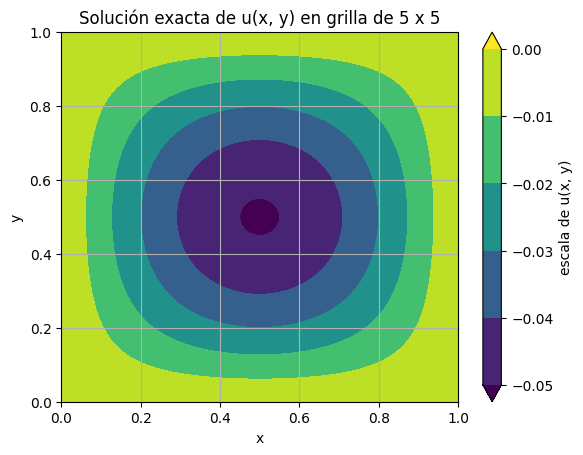

In [35]:
# Define la función u(x, y)
def u(x, y):
    return -1 / (2 * np.pi**2) * np.sin(np.pi * x) * np.sin(np.pi * y)

# Crea la malla de 5x5 en el dominio 0 < x < 1; 0 < y < 1
x = np.linspace(0, 1, 5)
y = np.linspace(0, 1, 5)
X, Y = np.meshgrid(x, y)

# Calcula los valores de u en la malla
u_SE_5x5 = u(X, Y)

# Interpolación para una grilla fina
x_fine = np.linspace(0, Lx, 1000)
y_fine = np.linspace(0, Ly, 1000)
interpolator = interp2d(x, y, u_SE_5x5.T, kind='cubic') 
u_fine = interpolator(x_fine, y_fine)

# Grafica el campo
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
cp = plt.contourf(X_fine, Y_fine, u_fine, cmap='viridis', levels=[-0.05, -0.04, -0.03, -0.02, -0.01, 0.00], vmin=-0.05, vmax=0.00, extend='both')
plt.colorbar(cp, label='escala de u(x, y)', extend='both', ticks=[-0.05, -0.04, -0.03, -0.02, -0.01, 0.00])
plt.title(f'Solución exacta de u(x, y) en grilla de 5 x 5')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

#### II - Grilla de 10 x 10:

C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\1325260819.py:16: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interpolator = interp2d(x, y, u_SE_10x10.T, kind='cubic')
C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\1325260819.py:17: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisple

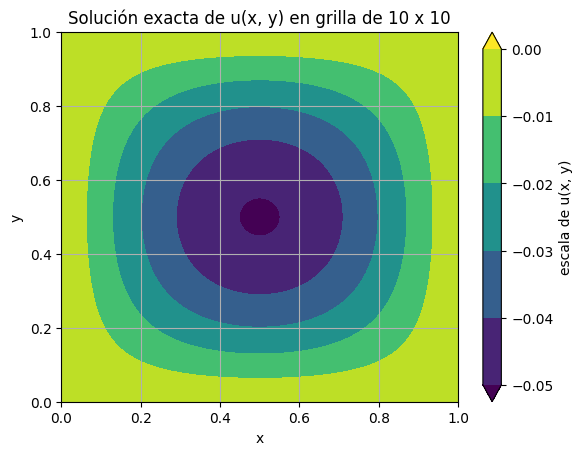

In [36]:
# Define la función u(x, y)
def u(x, y):
    return -1 / (2 * np.pi**2) * np.sin(np.pi * x) * np.sin(np.pi * y)

# Crea la malla de 10x10 en el dominio 0 < x < 1; 0 < y < 1
x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)
X, Y = np.meshgrid(x, y)

# Calcula los valores de u en la malla
u_SE_10x10 = u(X, Y)

# Interpolación para una grilla fina
x_fine = np.linspace(0, Lx, 1000)
y_fine = np.linspace(0, Ly, 1000)
interpolator = interp2d(x, y, u_SE_10x10.T, kind='cubic')  
u_fine = interpolator(x_fine, y_fine)

# Grafica el campo
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
cp = plt.contourf(X_fine, Y_fine, u_fine, cmap='viridis', levels=[-0.05, -0.04, -0.03, -0.02, -0.01, 0.00], vmin=-0.05, vmax=0.00, extend='both')
plt.colorbar(label='escala de u(x, y)', extend='both', ticks=[-0.05, -0.04, -0.03, -0.02, -0.01, 0.00])
plt.title(f'Solución exacta de u(x, y) en grilla de 10 x 10')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

#### III - Grilla de 20 x 20:

C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\868946335.py:16: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interpolator = interp2d(x, y, u_SE_20x20.T, kind='cubic')
C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\868946335.py:17: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev`

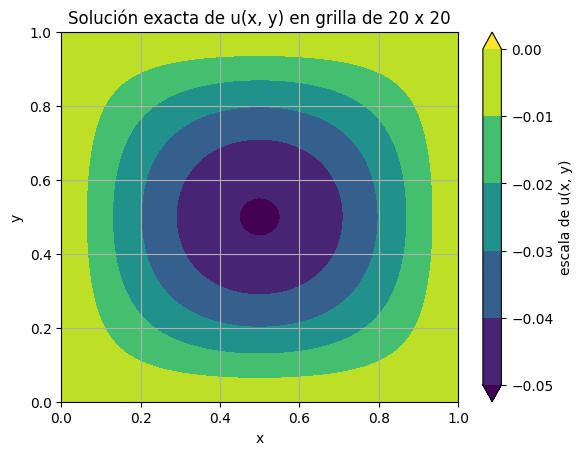

In [37]:
# Define la función u(x, y)
def u(x, y):
    return -1 / (2 * np.pi**2) * np.sin(np.pi * x) * np.sin(np.pi * y)

# Crea la malla de 10x10 en el dominio 0 < x < 1; 0 < y < 1
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x, y)

# Calcula los valores de u en la malla
u_SE_20x20 = u(X, Y)

# Interpolación para una grilla fina
x_fine = np.linspace(0, Lx, 1000)
y_fine = np.linspace(0, Ly, 1000)
interpolator = interp2d(x, y, u_SE_20x20.T, kind='cubic')  
u_fine = interpolator(x_fine, y_fine)

# Grafica el campo
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
cp = plt.contourf(X_fine, Y_fine, u_fine, cmap='viridis', levels=[-0.05, -0.04, -0.03, -0.02, -0.01, 0.00], vmin=-0.05, vmax=0.00, extend='both')
plt.colorbar(label='escala de u(x, y)', extend='both', ticks=[-0.05, -0.04, -0.03, -0.02, -0.01, 0.00])
plt.title(f'Solución exacta de u(x, y) en grilla de 20 x 20')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### Experimento Diferencia entre solución exacta y por diferencias finitas de la ecuación diferencial de la divergencia de u

#### I - Grilla de 5 x 5:

C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\1141654131.py:11: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interpolador = interp2d(x_5x5, y_5x5, diferencia_5x5, kind='cubic')
C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\1141654131.py:12: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplre

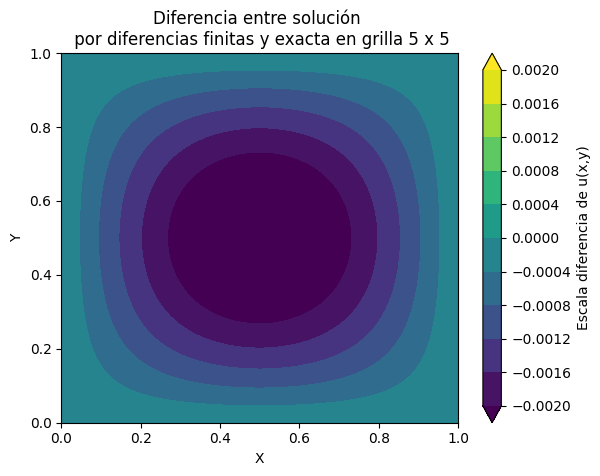

In [25]:
# Calcula la diferencia entre los dos campos
diferencia_5x5 = u_DF_5x5 - u_SE_5x5

# Define una grilla para las coordenadas X e Y
x_5x5 = np.linspace(0, 1, diferencia_5x5.shape[1])
y_5x5 = np.linspace(0, 1, diferencia_5x5.shape[0])

# Interpola la diferencia a una grilla fina 1000x1000
x_fina = np.linspace(0, 1, 1000)
y_fina = np.linspace(0, 1, 1000)
interpolador = interp2d(x_5x5, y_5x5, diferencia_5x5, kind='cubic')
diferencia_fina = interpolador(x_fina, y_fina)

# Crea la grilla fina para graficar
X_fina, Y_fina = np.meshgrid(x_fina, y_fina)

# Grafica el resultado
plt.contourf(X_fina, Y_fina, diferencia_fina, cmap='viridis', levels=[-0.0020, -0.0016, -0.0012, -0.0008, -0.0004, 0.000, 0.0004, 0.0008, 0.0012, 0.0016, 0.0020], vmin=-0.0020, vmax=0.0020, extend='both')
plt.colorbar(label='Escala diferencia de u(x,y)', extend='both', ticks=[-0.0020, -0.0016, -0.0012, -0.0008, -0.0004, 0.000, 0.0004, 0.0008, 0.0012, 0.0016, 0.0020])
plt.title('Diferencia entre solución \n por diferencias finitas y exacta en grilla 5 x 5')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### II - Grilla de 10 x 10:

C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\1597734050.py:11: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interpolador = interp2d(x_10x10, y_10x10, diferencia_10x10, kind='cubic')
C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\1597734050.py:12: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `b

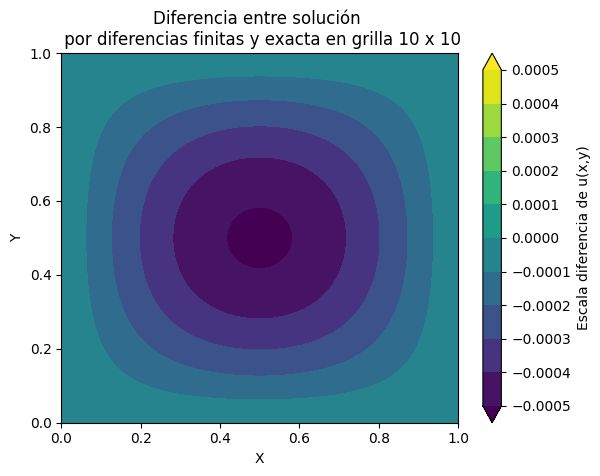

In [29]:
# Calcula la diferencia entre los dos campos
diferencia_10x10 = u_DF_10x10 - u_SE_10x10

# Define una grilla para las coordenadas X e Y
x_10x10 = np.linspace(0, 1, diferencia_10x10.shape[1])
y_10x10 = np.linspace(0, 1, diferencia_10x10.shape[0])

# Interpola la diferencia a una grilla fina 1000x1000
x_fina = np.linspace(0, 1, 1000)
y_fina = np.linspace(0, 1, 1000)
interpolador = interp2d(x_10x10, y_10x10, diferencia_10x10, kind='cubic')
diferencia_fina = interpolador(x_fina, y_fina)

# Crea la grilla fina para graficar
X_fina, Y_fina = np.meshgrid(x_fina, y_fina)

# Grafica el resultado
plt.contourf(X_fina, Y_fina, diferencia_fina, cmap='viridis', levels=[-0.0005, -0.0004, -0.0003, -0.0002, -0.0001, 0.000, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005], vmin=-0.0005, vmax=0.0005, extend='both')
plt.colorbar(label='Escala diferencia de u(x,y)', extend='both', ticks=[-0.0005, -0.0004, -0.0003, -0.0002, -0.0001, 0.000, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005])
plt.title('Diferencia entre solución \n por diferencias finitas y exacta en grilla 10 x 10')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### III - Grilla de 20 x 20:

C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\1465195973.py:11: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interpolador = interp2d(x_20x20, y_20x20, diferencia_20x20, kind='cubic')
C:\Users\fabri\AppData\Local\Temp\ipykernel_6380\1465195973.py:12: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `b

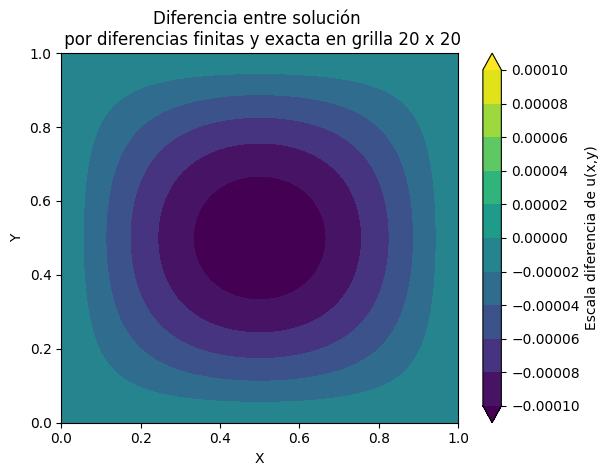

In [32]:
# Calcula la diferencia entre los dos campos
diferencia_20x20 = u_DF_20x20 - u_SE_20x20

# Define una grilla para las coordenadas X e Y
x_20x20 = np.linspace(0, 1, diferencia_20x20.shape[1])
y_20x20 = np.linspace(0, 1, diferencia_20x20.shape[0])

# Interpola la diferencia a una grilla fina 1000x1000
x_fina = np.linspace(0, 1, 1000)
y_fina = np.linspace(0, 1, 1000)
interpolador = interp2d(x_20x20, y_20x20, diferencia_20x20, kind='cubic')
diferencia_fina = interpolador(x_fina, y_fina)

# Crea la grilla fina para graficar
X_fina, Y_fina = np.meshgrid(x_fina, y_fina)

# Grafica el resultado
plt.contourf(X_fina, Y_fina, diferencia_fina, cmap='viridis', levels=[-0.00010, -0.00008, -0.00006, -0.00004, -0.00002, 0.000, 0.00002, 0.00004, 0.00006, 0.00008, 0.00010], vmin=-0.00010, vmax=0.00010, extend='both')
plt.colorbar(label='Escala diferencia de u(x,y)', extend='both', ticks=[-0.00010, -0.00008, -0.00006, -0.00004, -0.00002, 0.000, 0.00002, 0.00004, 0.00006, 0.00008, 0.00010])
plt.title('Diferencia entre solución \n por diferencias finitas y exacta en grilla 20 x 20')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()